<a href="https://colab.research.google.com/github/alirezash97/Machine-Learning-Course/blob/main/Final_Project/Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614769186&Signature=TF3GWgyuUO6snBbvcYB8XQ%2F%2BdYpUNK%2BMTaeocRh2NID2323n%2FgO21bm5QtFz5Mux6JpY1d2fJn3oq%2By1tOfqIUCSDO0bzET4S5HFHYMtO4XIC%2Fo%2FnRylWMK3eXE3Ev4s4a%2Bk2%2FnXHfJG5wfTfW8UZ6ScIEDyDjtCj6VyvquLTrxK19tT4woHbNpIMxqVTPP%2FMx6OIhMqV5GaaXmpdLcDY4LtjqrEogj6QtquiWeXrNUnVDfTyxSlpoj%2BVsGwlwofIuxUsGG9iqhSSTo%2F9l%2FeFCtLlTI%2FOVUm3WSyu%2BFViSFhZ8ZOoUV8yUGm0qsGFbF5FMcpVeI4dT8rdp93s6Ezog%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'



# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train_annotations.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1614769218&Signature=jtUg9fJpXJgw4v%2Bt7Q5Mng8M%2FhiW3m4BZL9%2BDYASeFl3CgxqY7COpfLKYTSLNRmKy1DRGhpWCC9v0jWNbyYQvf51CulG9MSGAuE4Irs%2BSx60%2FCpXn6CbY2qu%2BF3HJPqGMsHn90VddyIfP%2B7mS2uhDZM4zRlOIJK5B4ZGb3841lgoopJS3D0DFBpdF1TGKolSXPyxU3lBQbKk5QfUgeuYITvIguQcHbRONzJdiA1DYh%2FrBMwV9wFK4bPQELTKnbaisY6Yi%2BRcbXKmrJk2G6TOlUf%2F4Xb2zjikb8CkjmhGW5QQP6WxhBCh2iy6uu64pt1Qt6u2JeNZPisPMLzhim4idg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_annotations.csv.zip'

In [ ]:
# !mkdir /content/trainset
# !mkdir /content/trainset/data/
# !mkdir /content/trainset/data/1/
# !unzip '/content/train.zip' -d /content/trainset/data/1/
# !unzip '/content/train_annotations.csv.zip' -d /content/trainset/annotations/

In [1]:
import pandas as pd 
annotations = pd.read_csv('/content/trainset/annotations/train_annotations.csv')
annotations.head()

,StudyInstanceUID,label,data
0,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1487, 1279], [1477, 1168], [1472, 1052], [14..."
1,1.2.826.0.1.3680043.8.498.12616281126973421762...,CVC - Normal,"[[1328, 7], [1347, 101], [1383, 193], [1400, 2..."
2,1.2.826.0.1.3680043.8.498.72921907356394389969...,CVC - Borderline,"[[801, 1207], [812, 1112], [823, 1023], [842, ..."
3,1.2.826.0.1.3680043.8.498.11697104485452001927...,CVC - Normal,"[[1366, 961], [1411, 861], [1453, 751], [1508,..."
4,1.2.826.0.1.3680043.8.498.87704688663091069148...,NGT - Normal,"[[1862, 14], [1845, 293], [1801, 869], [1716, ..."


In [2]:
len(annotations)

17999

In [3]:
import re
import ast
import numpy as np
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

In [4]:
import numpy as np 

##############
msk_for_dataset_subset = np.random.rand(len(annotations)) < 1
dataset_subset = annotations[msk_for_dataset_subset]
##############

msk = np.random.rand(len(dataset_subset)) > 0.25
train_samples = dataset_subset[msk]
validation_samples = dataset_subset[~msk]

##############
# train_samples = train_samples[:5000]
# validation_samples = validation_samples[:1500]
##############
print('number of train samples: ', len(train_samples))
print('number of validation samples: ', len(validation_samples))



sample = dataset_subset.iloc[1, :]
landmarks = sample['data']
# print(landmarks)
landmarks = np.array(str2array(landmarks))
# print(type(landmarks))
# landmarks = np.array(list(landmarks))
print("sample landmark shape: ", landmarks.shape)
# print(landmarks)

# print('Image name: {}'.format(img_name))
# print('Landmarks shape: {}'.format(landmarks.shape))
# print('First 4 Landmarks: {}'.format(landmarks[:4]))

number of train samples:  13518
number of validation samples:  4481
sample landmark shape:  (13, 2)


In [5]:
def distance(x1, x2, y1, y2):
  return np.sqrt( (x1-x2)**2 + (y1-y2)**2 )

In [6]:
from PIL import Image
import random
import torch.nn.functional as F
from math import cos, sin, radians
import imutils
import cv2
from matplotlib import cm
import scipy.misc
from skimage.draw import line

class RANZCRDataset():


    def __init__(self, csv_file='/content/trainset/train.csv', root_dir='/content/trainset/data/1', transform=None,
                                                                            transform_label=None, images_name=None):
      
      
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.Images_name = images_name
        self.root_dir = root_dir
        self.transform = transform
        self.transform_label = transform_label
        

    def __len__(self):
        return len(self.Images_name)

    #############


    # def get_rot_mat(self, theta):

    #   theta = torch.tensor(theta)
    #   return torch.tensor([[torch.cos(theta), -torch.sin(theta), 0],
    #                         [torch.sin(theta), torch.cos(theta), 0]])



    # def rot_img_landmark(self, x, landmarks, theta, dtype):
    #     rot_mat = self.get_rot_mat(theta)[None, ...].type(dtype).repeat(x.shape[0],1,1)
    #     grid = F.affine_grid(rot_mat, x.size()).type(dtype)
    #     image = F.grid_sample(x, grid)
    #     landmarks = landmarks - 0.5
    #     new_landmarks = np.matmul(landmarks, transformation_matrix)
    #     new_landmarks = new_landmarks + 0.5
    #     return image, new_landmarks


    ##############

    def __getitem__(self, idx):
        centerCrop_value = 256
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.Images_name.iloc[idx, 0])
        image = Image.open(img_name + '.jpg').convert('RGB')
        labels = self.Images_name.iloc[idx, -1]
        labels = torch.from_numpy(str2array(labels))
        sample = {'image': image, 'label': labels }


        if self.transform:

          
          tmp = np.zeros((100, 2))
          for i in range(0, (sample['label'].shape[0]) ):
            
            tmp[i, 0] = ( (centerCrop_value / np.array(image).shape[1]) * np.array(sample['label'])[i, 0] ) 
            tmp[i, 1] = ( (centerCrop_value / np.array(image).shape[0]) * np.array(sample['label'])[i, 1] ) 

          ############ just for show
          temp = np.zeros((100, 2))
          for i in range(0, (sample['label'].shape[0]) ):
            
            temp[i, 0] = ( (1032 / np.array(image).shape[1]) * np.array(sample['label'])[i, 0] ) 
            temp[i, 1] = ( (1032 / np.array(image).shape[0]) * np.array(sample['label'])[i, 1] ) 
          sample['landmark'] = torch.from_numpy(temp).type(torch.float16)
          ##########################
          
          

          ############################## landmark to segment
          label_img = self.transform_label(sample['image']).numpy()
          label_img = np.zeros((label_img.shape[1], label_img.shape[2]))
          
          for index_point1, landmark_point1 in enumerate(tmp):
            
            if (landmark_point1 != 0).any() :
              distance_dict = {}
              for index_point2, landmark_point2 in enumerate(tmp[index_point1+1:]):
                if (landmark_point2 != 0).any() :
                  distance_dict[index_point2] = distance(landmark_point1[0], landmark_point2[0],
                                                            landmark_point1[1], landmark_point2[1])
                else:
                  pass
              if distance_dict:
                my_point = min(distance_dict, key=distance_dict.get)
                rr, cc = line(int(landmark_point1[0]), int(landmark_point1[1]), 
                              int(tmp[(index_point1+my_point+1), 0]), int(tmp[(index_point1+my_point+1), 1]))

                for index, value in enumerate(rr):

                    if value == 256:
                      rr[index]-=3
                    elif value == 255:
                      rr[index]-=2
                    elif value == 254:
                      rr[index]-=1
                    elif value == 0:
                      rr[index]+=2
                    elif value == 1:
                      rr[index]+=1
                    else: 
                      pass
                for index, value in enumerate(cc):

                    if value == 256:
                      cc[index]-=3
                    elif value == 255:
                      cc[index]-=2
                    elif value == 254:
                      cc[index]-=1
                    elif value == 0:
                      cc[index]+=2
                    elif value == 1:
                      cc[index]+=1
                    else: 
                      pass
                # place ones lines
                label_img[cc-2, rr-2] = 1
                label_img[cc-1, rr-1] = 1
                label_img[cc, rr] = 1
                label_img[cc+1, rr+1] = 1
                label_img[cc+2, rr+2] = 1

            else:
              pass
            ####################################################


          # sample['label'] = torch.from_numpy(tmp).type(torch.float16)

          sample['label'] = torch.from_numpy(label_img).type(torch.long)

          sample['image'] = self.transform(sample['image'])

          


          # # random rotation
          # image, landmark = self.rot_img_landmark(sample['image'], sample['label'], np.pi/2, dtype= torch.FloatTensor)
          # print(type(image), image.shape)
          # print(type(landmark), landmark.shape)
          

        return sample

# my_dataset = RANZCRDataset
# my_dataset.__getitem__(self, 4)

In [7]:

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import torchvision
import os

# batch_size = 8
mean = np.array([0.4823, 0.4823, 0.4823])
std = np.array([0.191473164, 0.191473164, 0.191473164])


def load_data(csv_file='/content/trainset/annotations/train_annotations.csv', root_dir='/content/trainset/data/1'):

  centerCrop_value = 1032
  transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Resize((1056, 1056)),
                                  transforms.CenterCrop(centerCrop_value),
                                  transforms.Normalize(mean, std)])
  
  transform_label = transforms.Compose([transforms.ToTensor(),
                                  transforms.Resize((270, 270)),
                                  transforms.CenterCrop(256),
                                  transforms.Normalize(mean, std)])



  trainset = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                      root_dir='/content/trainset/data/1', transform=transform, 
                                      transform_label = transform_label, images_name=train_samples)




  validation_set = RANZCRDataset(csv_file='/content/trainset/annotations/train_annotations.csv',
                                    root_dir='/content/trainset/data/1', transform=transform,
                                    transform_label = transform_label, images_name=validation_samples)
  

  return trainset, validation_set






In [8]:
# trainset, testset = load_data()


# train_loader = torch.utils.data.DataLoader(trainset,
#                          batch_size=2,
#                          num_workers=0,
#                          shuffle=True)



# validation_loader = torch.utils.data.DataLoader(testset,
#                          batch_size=2,
#                          num_workers=0,
#                          shuffle=True)


In [9]:
import matplotlib.pyplot as plt
import copy

centerCrop_value = 904
def imshow_landmark(img, landmarks):
    npimg = img.numpy()
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    show_landmark = copy.deepcopy(landmarks)
    for i in range(show_landmark.shape[0]):
      show_landmark[i, :, 0] = show_landmark[i, :, 0] + (centerCrop_value*i)
    plt.scatter(show_landmark[:, :, 0], show_landmark[:, :, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()



In [10]:
import matplotlib.pyplot as plt


def imshow_segmented(segment_label):
    
    # npimg = img.numpy()
    # npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    # plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    

    npimg = (segment_label.detach().cpu().numpy()*255)
    dummy_channel = np.zeros((1, npimg.shape[1], npimg.shape[2]))
    npimg = np.concatenate([npimg, dummy_channel], axis=0)
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
    
    plt.show()

def imshow(img):
    
    npimg = img.numpy()
    npimg = ((npimg * std[0]) + mean[0]) # unnormalize
    plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))

    plt.show()


# get some random training images
# dataiter = iter(train_loader)
# sample = dataiter.next()


# print(sample['image'].shape)
# imshow(torchvision.utils.make_grid(sample['image']))

# print(sample['label'].shape)
# imshow_segmented(torchvision.utils.make_grid(sample['label']))

# print(sample['landmark'].shape)
# imshow_landmark(torchvision.utils.make_grid(sample['image']), sample['landmark'])


In [11]:
# class Network(nn.Module):
  
#   def __init__(self):
#     super(Network, self).__init__()
#     self.model = model
#     self.conv1 = nn.Conv2d(3, 3, 5)
#     self.conv2 = nn.Conv2d(3, 3, 1)
#     self.pool2 = nn.MaxPool2d(2, 2)
#     self.sigmoid = nn.Sigmoid()
#     self.fc_final = nn.Linear(1000, 11)

#   def forward(self, x):

#     x = self.pool2(F.relu(self.conv1(x)))
#     x = self.pool2(F.relu(self.conv2(x)))
#     x = self.model(x)
#     x = self.sigmoid(self.fc_final(x))
#     return x

# Network = Network()

In [12]:
import torch.nn as nn
from torchvision import models
from torch import optim
import time

model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=False, progress=True, num_classes=2, aux_loss=None)


In [13]:
model

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [14]:
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
  
  def __init__(self, c1=3):
    super(Net, self).__init__()
    self.model = model
    self.conv1 = nn.Conv2d(3, c1, 5)
    self.conv2 = nn.Conv2d(c1, 3, 3)
    self.pool2 = nn.MaxPool2d(2, 2)

  def forward(self, x):

    x = self.pool2(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.model(x)

    return x


In [15]:

# ###################################
# !pip install ray
# !pip install tensorboardX

In [16]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import tensorboardX

In [17]:
from sklearn.metrics import accuracy_score

def train_ranzcr_landmark(config, checkpoint_dir=None, data_dir=None):
    net = Net()
    checkpoint_dir = '/content/drive/MyDrive/RANZCR/'

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    criterion =  nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=config["lr"], weight_decay=config["wd"])

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, 'model_landmark_8_0.04599375.pth'))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    trainset, testset = load_data(data_dir)

    test_abs = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(
        trainset, [test_abs, len(trainset) - test_abs])
    
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)

    for epoch in range(15):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data['image'].float(), data['label']
            
            # batch_size = int(inputs.shape[0])
            # labels = np.zeros((batch_size, 200))
            # for i in range(batch_size):
            #   labels[i, :100] = labels_temp[i, :, 0]
            #   labels[i, 100:] = labels_temp[i, :, 1]

            # labels = (torch.from_numpy(labels)).type(torch.float16)
            inputs, labels = inputs.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            
            net.eval()
            outputs = net(inputs)['out']
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total_train = 0
        correct_train = 0
        accuracy = 0
        batch_counter = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():
                inputs, labels = data['image'].float(), data['label']
                # batch_size = int(inputs.shape[0])
                # labels = np.zeros((batch_size, 200))
                # for i in range(batch_size):
                #   labels[i, :100] = labels_temp[i, :, 0]
                #   labels[i, 100:] = labels_temp[i, :, 1]

                # labels = (torch.from_numpy(labels)).type(torch.float16)
                inputs, labels = inputs.to(device), labels.to(device)

                net.eval()
                outputs = net(inputs)['out']
                ############
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.nelement()
                correct_train += predicted.eq(labels.data).sum().item()
                train_accuracy = 100 * correct_train / total_train
                #############

                batch_counter += 1
                
                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=(train_accuracy))
        torch.save((net.state_dict(), optimizer.state_dict()), '/content/drive/MyDrive/RANZCR/model_landmark_%.8f.pth'%((val_loss / val_steps)))
    print("Finished Training")


            

In [18]:

def test_accuracy(net, device="cpu"):
    trainset, testset = load_data()

    criterion =  nn.CrossEntropyLoss()
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2)

    correct_test = 0
    total_test = 0
    batch_counter_test = 0
    accuracy_test = 0
    
    for data in testloader:
      with torch.no_grad():


        inputs, labels = data['image'].float(), data['label']
        batch_size = int(inputs.shape[0])
        batch_counter_test += 1 
        # labels = np.zeros((batch_size, 200))
        # for i in range(batch_size):
        #   labels[i, :100] = labels_temp[i, :, 0]
        #   labels[i, 100:] = labels_temp[i, :, 1]

        # labels = (torch.from_numpy(labels)).type(torch.float16)
        inputs, labels = inputs.to(device), labels.to(device)

        net.eval()
        outputs = outputs = net(inputs)['out']
        # _, predicted = torch.max(outputs.data, 1)
        # total += labels.size(0)
        # correct += (predicted == labels).sum().item()
        # my_validation_outputs = (outputs > 0.5)
        # print('------------------------------------------------------------------------------')
        # print(labels)
        # print(my_validation_outputs)
        # print('------------------------------------------------------------------------------')
        # accuracy += auc_s(labels, my_validation_outputs)
        # batch_counter += 1
        ############
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.nelement()
        correct_test += predicted.eq(labels.data).sum().item()
        test_accuracy = 100 * correct_test / total_test
        #############


    return test_accuracy

In [19]:

def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):
    data_dir = os.path.abspath("/content/trainset/data")
    load_data(data_dir)
    config = {
        "lr": tune.choice([0.0422581]),
        "wd": tune.choice([4.12557e-06]),
        "c1": tune.choice([3]),
        "batch_size": tune.choice([8])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "accuracy", "training_iteration"])

    result = tune.run(
            partial(train_ranzcr_landmark, data_dir=data_dir),
            resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
            config=config,
            num_samples=num_samples,
            scheduler=scheduler,
            progress_reporter=reporter)
      
    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

    best_trained_model = Net()
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)
    test_acc = test_accuracy(best_trained_model, device)
    torch.save(best_trained_model.state_dict(), '/content/drive/MyDrive/RANZCR/model_landmark_%.3f.pth'%(test_acc) )
    print("Best trial test set accuracy: {}".format(test_acc))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=1, max_num_epochs=20, gpus_per_trial=1)

2021-03-04 16:42:36,204	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265
2021-03-04 16:42:39,051	WARNING experiment.py:292 -- No name detected on trainable. Using DEFAULT.
2021-03-04 16:42:39,053	INFO registry.py:65 -- Detected unknown callable for trainable. Converting to class.
2021-03-04 16:42:44,866	WARNING worker.py:1107 -- Warning: The actor ImplicitFunc has size 163341096 when pickled. It will be stored in Redis, which could cause memory issues. This may mean that its definition uses a large array or other object.


== Status ==
Memory usage on this node: 2.0/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.47 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:P100)
Result logdir: /root/ray_results/DEFAULT_2021-03-04_16-42-39
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+-------+--------------+------+-----------+-------------+
| Trial name          | status   | loc   |   batch_size |   c1 |        lr |          wd |
|---------------------+----------+-------+--------------+------+-----------+-------------|
| DEFAULT_a2d32_00000 | RUNNING  |       |            8 |    3 | 0.0422581 | 4.12557e-06 |
+---------------------+----------+-------+--------------+------+-----------+-------------+


Result for DEFAULT_a2d32_00000:
  accuracy: 98.86981749675682
  date: 2021-03-04_20-12-34
  done: false
  experiment_id: 354c0d8c1f7e41b591c6efda

2021-03-04 20:12:35,898	WARNING util.py:152 -- The `process_trial_save` operation took 1.296 s, which may be a performance bottleneck.


Result for DEFAULT_a2d32_00000:
  accuracy: 98.86981749675682
  date: 2021-03-04_23-46-54
  done: false
  experiment_id: 354c0d8c1f7e41b591c6efdac86724bc
  hostname: 9d43dae368a0
  iterations_since_restore: 2
  loss: 0.04416019128933108
  node_ip: 172.28.0.2
  pid: 1313
  should_checkpoint: true
  time_since_restore: 25447.958615779877
  time_this_iter_s: 12860.300954580307
  time_total_s: 25447.958615779877
  timestamp: 1614901614
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: a2d32_00000
  
== Status ==
Memory usage on this node: 4.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 16.000: None | Iter 8.000: None | Iter 4.000: None | Iter 2.000: -0.04416019128933108 | Iter 1.000: -0.04513954879859319
Resources requested: 2/2 CPUs, 1/1 GPUs, 0.0/7.47 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:P100)
Result logdir: /root/ray_results/DEFAULT_2021-03-04_16-42-39
Number of trials: 1/1 (1 RUNNING)
+---------------------+----------+-----------------+--

2021-03-04 23:46:55,886	WARNING util.py:152 -- The `process_trial_save` operation took 1.283 s, which may be a performance bottleneck.


KeyboardInterrupt: ignored

In [ ]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(count_parameters(model))
# print(count_parameters(Network))

In [21]:
# trained_model = torch.load()
my_net = Net()
net_std, net_optdict = torch.load('/content/drive/MyDrive/RANZCR/model_landmark_10_0.04416019.pth')
my_net.load_state_dict(net_std)

<All keys matched successfully>

input :  torch.Size([4, 3, 1032, 1032])


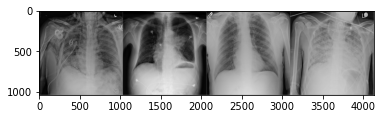

landmarks :  torch.Size([4, 100, 2])


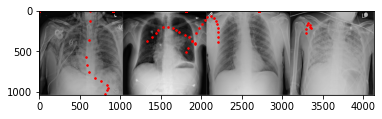

segmentation label :  torch.Size([4, 1, 256, 256])


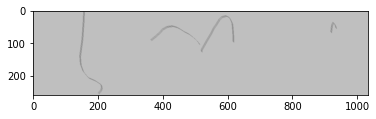

predicted outputs :  torch.Size([4, 2, 256, 256])


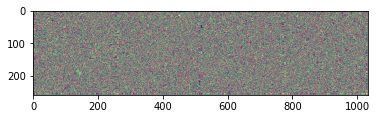

In [22]:

from torch.autograd import Variable

_, my_testset = load_data()

my_testloader = torch.utils.data.DataLoader(
        my_testset, batch_size=4, shuffle=False, num_workers=2)

dataiter = iter(my_testloader)
sample = dataiter.next()



print('input : ', sample['image'].shape)
imshow(torchvision.utils.make_grid(sample['image']))


print('landmarks : ',sample['landmark'].shape)
imshow_landmark(torchvision.utils.make_grid(sample['image']), sample['landmark'])


my_labels = torch.unsqueeze(sample['label'], 1)
print('segmentation label : ',my_labels.shape)
imshow_segmented(torchvision.utils.make_grid(my_labels))


####################################
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"
    if torch.cuda.device_count() > 1:
        my_net = nn.DataParallel(my_net)
my_net.to(device)


inputs, labels = sample['image'].float(), sample['label']
batch_size = int(inputs.shape[0])
inputs, labels = inputs.to(device), labels.to(device)
my_outputs = my_net(inputs)['out']
outputs = torch.squeeze(my_outputs, 0)
print('predicted outputs : ',outputs.shape)
imshow_segmented(torchvision.utils.make_grid(outputs))